In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
titanic = pd.read_csv("resources/titanic_train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## missing data

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

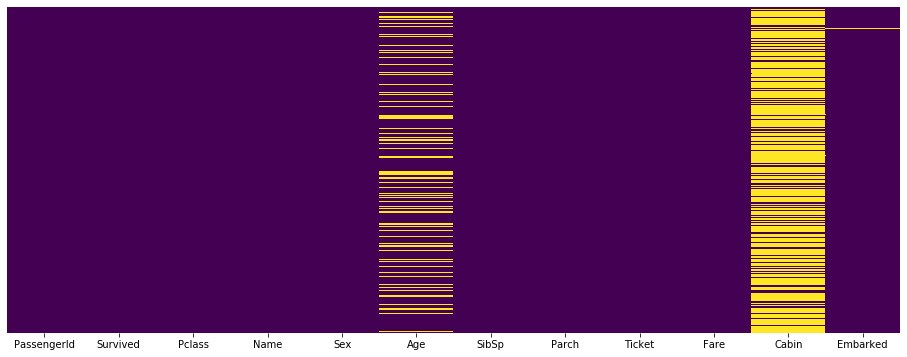

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

## we will eliminate columns with too many missing data points and replace values that are responable

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


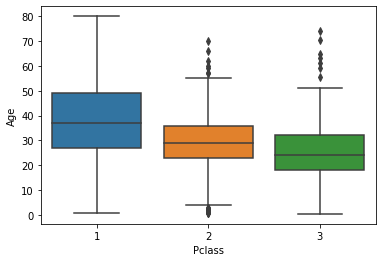

In [9]:
sns.boxplot(x = "Pclass", y = "Age", data=titanic)

## appears the average age of a person on 1st is 38, 2nd  30, and 3rd is 28 so we wil ldeal with the missing data that way

In [10]:
def deal_with_missing(columns):
    pclass = columns[0]
    age = columns[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 28
    else:
        return age
    

## appling our function 

In [11]:
titanic["Age"] = titanic[["Pclass","Age"]].apply(deal_with_missing, axis = 1)

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

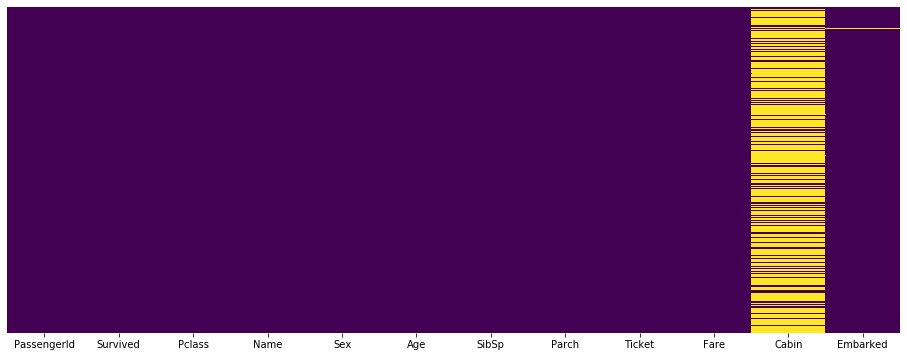

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### removing data 

In [14]:
titanic.drop("Cabin", axis=1, inplace=True)

In [15]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
titanic.dropna(inplace=True)

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### getting dummies 

In [18]:
sex = pd.get_dummies(titanic["Sex"], drop_first=True)

In [19]:
titanic["Sex"] = sex

In [20]:
emb = pd.get_dummies(titanic["Embarked"], drop_first=True)

In [21]:
titanic = pd.concat([titanic, emb], axis=1)

In [22]:
titanic.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [23]:
titanic.drop("Embarked", axis=1, inplace=True)

In [24]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


### Training Data

In [25]:
X = titanic.drop("Survived", axis=1).values
y = titanic["Survived"].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scalar = MinMaxScaler()

In [30]:
X_train = scalar.fit_transform(X_train)

In [31]:
X_test = scalar.transform(X_test)

### Developing out ANN 

In [32]:
X_train.shape

(622, 8)

In [33]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense

In [35]:
model =Sequential()
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [36]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500)

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 2s 3ms/sample - loss: 0.6911 - val_loss: 0.6777
Epoch 2/500
622/622 [==============================] - 0s 193us/sample - loss: 0.6652 - val_loss: 0.6498
Epoch 3/500
622/622 [==============================] - 0s 199us/sample - loss: 0.6400 - val_loss: 0.6315
Epoch 4/500
622/622 [==============================] - 0s 196us/sample - loss: 0.6232 - val_loss: 0.6189
Epoch 5/500
622/622 [==============================] - 0s 235us/sample - loss: 0.6113 - val_loss: 0.6093
Epoch 6/500
622/622 [==============================] - 0s 239us/sample - loss: 0.6018 - val_loss: 0.6022
Epoch 7/500
622/622 [==============================] - 0s 264us/sample - loss: 0.5945 - val_loss: 0.5955
Epoch 8/500
622/622 [==============================] - 0s 254us/sample - loss: 0.5868 - val_loss: 0.5877
Epoch 9/500
622/622 [==============================] - 0s 192us/sample - loss: 0.5783 - val_loss: 0.5786
Epoch 10/50

Epoch 78/500
622/622 [==============================] - 0s 193us/sample - loss: 0.4361 - val_loss: 0.4175
Epoch 79/500
622/622 [==============================] - 0s 337us/sample - loss: 0.4361 - val_loss: 0.4170
Epoch 80/500
622/622 [==============================] - 0s 363us/sample - loss: 0.4362 - val_loss: 0.4176
Epoch 81/500
622/622 [==============================] - 0s 336us/sample - loss: 0.4366 - val_loss: 0.4153
Epoch 82/500
622/622 [==============================] - 0s 243us/sample - loss: 0.4355 - val_loss: 0.4198
Epoch 83/500
622/622 [==============================] - 0s 280us/sample - loss: 0.4349 - val_loss: 0.4158
Epoch 84/500
622/622 [==============================] - 0s 285us/sample - loss: 0.4352 - val_loss: 0.4143
Epoch 85/500
622/622 [==============================] - 0s 250us/sample - loss: 0.4347 - val_loss: 0.4162
Epoch 86/500
622/622 [==============================] - 0s 233us/sample - loss: 0.4336 - val_loss: 0.4150
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 243us/sample - loss: 0.4243 - val_loss: 0.3999
Epoch 156/500
622/622 [==============================] - 0s 208us/sample - loss: 0.4242 - val_loss: 0.3974
Epoch 157/500
622/622 [==============================] - 0s 216us/sample - loss: 0.4240 - val_loss: 0.3994
Epoch 158/500
622/622 [==============================] - 0s 228us/sample - loss: 0.4262 - val_loss: 0.3991
Epoch 159/500
622/622 [==============================] - 0s 208us/sample - loss: 0.4236 - val_loss: 0.3974
Epoch 160/500
622/622 [==============================] - 0s 187us/sample - loss: 0.4236 - val_loss: 0.3977
Epoch 161/500
622/622 [==============================] - 0s 186us/sample - loss: 0.4235 - val_loss: 0.4000
Epoch 162/500
622/622 [==============================] - 0s 234us/sample - loss: 0.4239 - val_loss: 0.3994
Epoch 163/500
622/622 [==============================] - 0s 231us/sample - loss: 0.4247 - val_loss: 0.3969
Epoch 164/500
622/622 [==============

622/622 [==============================] - 0s 231us/sample - loss: 0.4194 - val_loss: 0.3912
Epoch 232/500
622/622 [==============================] - 0s 281us/sample - loss: 0.4189 - val_loss: 0.3913
Epoch 233/500
622/622 [==============================] - 0s 242us/sample - loss: 0.4196 - val_loss: 0.3927
Epoch 234/500
622/622 [==============================] - 0s 207us/sample - loss: 0.4190 - val_loss: 0.3907
Epoch 235/500
622/622 [==============================] - 0s 180us/sample - loss: 0.4204 - val_loss: 0.3903
Epoch 236/500
622/622 [==============================] - 0s 189us/sample - loss: 0.4193 - val_loss: 0.3929
Epoch 237/500
622/622 [==============================] - 0s 224us/sample - loss: 0.4183 - val_loss: 0.3913
Epoch 238/500
622/622 [==============================] - 0s 238us/sample - loss: 0.4188 - val_loss: 0.3910
Epoch 239/500
622/622 [==============================] - 0s 191us/sample - loss: 0.4196 - val_loss: 0.3910
Epoch 240/500
622/622 [============================

622/622 [==============================] - 0s 214us/sample - loss: 0.4162 - val_loss: 0.3870
Epoch 308/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4163 - val_loss: 0.3865
Epoch 309/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4177 - val_loss: 0.3867
Epoch 310/500
622/622 [==============================] - 0s 195us/sample - loss: 0.4158 - val_loss: 0.3855
Epoch 311/500
622/622 [==============================] - 0s 238us/sample - loss: 0.4157 - val_loss: 0.3871
Epoch 312/500
622/622 [==============================] - 0s 266us/sample - loss: 0.4161 - val_loss: 0.3863
Epoch 313/500
622/622 [==============================] - 0s 296us/sample - loss: 0.4163 - val_loss: 0.3863
Epoch 314/500
622/622 [==============================] - 0s 266us/sample - loss: 0.4157 - val_loss: 0.3864
Epoch 315/500
622/622 [==============================] - 0s 214us/sample - loss: 0.4157 - val_loss: 0.3872
Epoch 316/500
622/622 [============================

622/622 [==============================] - 0s 252us/sample - loss: 0.4140 - val_loss: 0.3855
Epoch 384/500
622/622 [==============================] - 0s 313us/sample - loss: 0.4135 - val_loss: 0.3837
Epoch 385/500
622/622 [==============================] - 0s 396us/sample - loss: 0.4160 - val_loss: 0.3834
Epoch 386/500
622/622 [==============================] - 0s 244us/sample - loss: 0.4153 - val_loss: 0.3864
Epoch 387/500
622/622 [==============================] - 0s 279us/sample - loss: 0.4138 - val_loss: 0.3833
Epoch 388/500
622/622 [==============================] - 0s 195us/sample - loss: 0.4132 - val_loss: 0.3838
Epoch 389/500
622/622 [==============================] - 0s 238us/sample - loss: 0.4129 - val_loss: 0.3845
Epoch 390/500
622/622 [==============================] - 0s 372us/sample - loss: 0.4135 - val_loss: 0.3841
Epoch 391/500
622/622 [==============================] - 0s 348us/sample - loss: 0.4133 - val_loss: 0.3844
Epoch 392/500
622/622 [============================

622/622 [==============================] - 0s 294us/sample - loss: 0.4111 - val_loss: 0.3808
Epoch 460/500
622/622 [==============================] - 0s 177us/sample - loss: 0.4126 - val_loss: 0.3843
Epoch 461/500
622/622 [==============================] - 0s 195us/sample - loss: 0.4122 - val_loss: 0.3828
Epoch 462/500
622/622 [==============================] - 0s 212us/sample - loss: 0.4125 - val_loss: 0.3804
Epoch 463/500
622/622 [==============================] - 0s 233us/sample - loss: 0.4114 - val_loss: 0.3820
Epoch 464/500
622/622 [==============================] - 0s 262us/sample - loss: 0.4114 - val_loss: 0.3824
Epoch 465/500
622/622 [==============================] - 0s 252us/sample - loss: 0.4105 - val_loss: 0.3811
Epoch 466/500
622/622 [==============================] - 0s 247us/sample - loss: 0.4107 - val_loss: 0.3815
Epoch 467/500
622/622 [==============================] - 0s 200us/sample - loss: 0.4115 - val_loss: 0.3816
Epoch 468/500
622/622 [============================

## Check performance

In [37]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.691129,0.677667
1,0.665235,0.649821
2,0.639998,0.631511
3,0.623232,0.618896
4,0.611276,0.609317
...,...,...
495,0.410632,0.381150
496,0.409165,0.380518
497,0.409477,0.380854
498,0.409075,0.381817


## model looks to be overfitting..though the predicitons may improve we are overfitting the dat aso lets set a stop at the lowest error of the valus loss

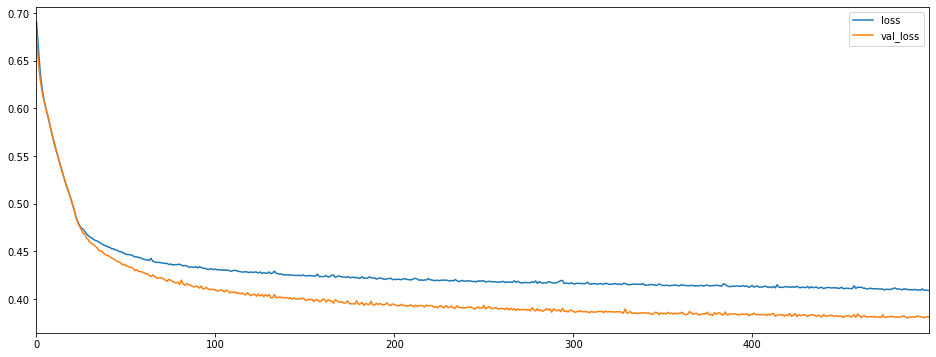

In [38]:
pd.DataFrame(model.history.history).plot(figsize =(16,6))

### model looks really good in terms of the error lets check the predictions

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       163
           1       0.89      0.68      0.77       104

    accuracy                           0.84       267
   macro avg       0.86      0.81      0.83       267
weighted avg       0.85      0.84      0.84       267



In [42]:
print(confusion_matrix(y_test,predictions))

[[154   9]
 [ 33  71]]


In [43]:
model =Sequential()
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
stop = EarlyStopping(mode="min", patience=25)

In [46]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), callbacks=[stop])

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 1s 2ms/sample - loss: 0.6429 - val_loss: 0.6393
Epoch 2/500
622/622 [==============================] - 0s 289us/sample - loss: 0.6335 - val_loss: 0.6325
Epoch 3/500
622/622 [==============================] - 0s 273us/sample - loss: 0.6275 - val_loss: 0.6269
Epoch 4/500
622/622 [==============================] - 0s 263us/sample - loss: 0.6221 - val_loss: 0.6218
Epoch 5/500
622/622 [==============================] - 0s 436us/sample - loss: 0.6169 - val_loss: 0.6165
Epoch 6/500
622/622 [==============================] - 0s 274us/sample - loss: 0.6112 - val_loss: 0.6101
Epoch 7/500
622/622 [==============================] - 0s 267us/sample - loss: 0.6047 - val_loss: 0.6033
Epoch 8/500
622/622 [==============================] - 0s 248us/sample - loss: 0.5979 - val_loss: 0.5955
Epoch 9/500
622/622 [==============================] - 0s 331us/sample - loss: 0.5887 - val_loss: 0.5839
Epoch 10/50

Epoch 78/500
622/622 [==============================] - 0s 222us/sample - loss: 0.4309 - val_loss: 0.4043
Epoch 79/500
622/622 [==============================] - 0s 242us/sample - loss: 0.4306 - val_loss: 0.4052
Epoch 80/500
622/622 [==============================] - 0s 227us/sample - loss: 0.4295 - val_loss: 0.4037
Epoch 81/500
622/622 [==============================] - 0s 224us/sample - loss: 0.4299 - val_loss: 0.4023
Epoch 82/500
622/622 [==============================] - 0s 242us/sample - loss: 0.4296 - val_loss: 0.4027
Epoch 83/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4297 - val_loss: 0.4036
Epoch 84/500
622/622 [==============================] - 0s 160us/sample - loss: 0.4291 - val_loss: 0.4034
Epoch 85/500
622/622 [==============================] - 0s 208us/sample - loss: 0.4288 - val_loss: 0.4010
Epoch 86/500
622/622 [==============================] - 0s 236us/sample - loss: 0.4284 - val_loss: 0.4020
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 235us/sample - loss: 0.4166 - val_loss: 0.3942
Epoch 156/500
622/622 [==============================] - 0s 232us/sample - loss: 0.4176 - val_loss: 0.3928
Epoch 157/500
622/622 [==============================] - 0s 240us/sample - loss: 0.4154 - val_loss: 0.3963
Epoch 158/500
622/622 [==============================] - 0s 241us/sample - loss: 0.4165 - val_loss: 0.3959
Epoch 159/500
622/622 [==============================] - 0s 171us/sample - loss: 0.4169 - val_loss: 0.3927
Epoch 160/500
622/622 [==============================] - 0s 190us/sample - loss: 0.4166 - val_loss: 0.3957
Epoch 161/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4154 - val_loss: 0.3935
Epoch 162/500
622/622 [==============================] - 0s 231us/sample - loss: 0.4158 - val_loss: 0.3938
Epoch 163/500
622/622 [==============================] - 0s 235us/sample - loss: 0.4157 - val_loss: 0.3956
Epoch 164/500
622/622 [==============

## performance

In [47]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.642869,0.639267
1,0.633491,0.632518
2,0.627471,0.626932
3,0.622056,0.621797
4,0.616904,0.616515
...,...,...
207,0.412091,0.393545
208,0.412155,0.393671
209,0.412034,0.393141
210,0.412747,0.394023


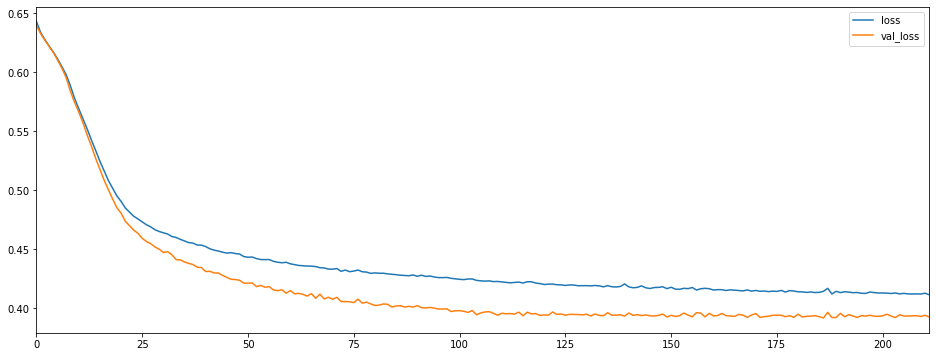

In [48]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [49]:
pred = model.predict_classes(X_test)

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       163
           1       0.92      0.64      0.76       104

    accuracy                           0.84       267
   macro avg       0.86      0.80      0.82       267
weighted avg       0.85      0.84      0.83       267



## lets add a Drop instnce at each neuron

In [51]:
from tensorflow.keras.layers import Dropout

In [52]:
model =Sequential()
model.add(Dense(units = 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [53]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), callbacks=[stop])

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 2s 4ms/sample - loss: 0.7104 - val_loss: 0.6107
Epoch 2/500
622/622 [==============================] - 0s 600us/sample - loss: 0.6716 - val_loss: 0.5934
Epoch 3/500
622/622 [==============================] - 0s 330us/sample - loss: 0.6385 - val_loss: 0.5812
Epoch 4/500
622/622 [==============================] - 0s 340us/sample - loss: 0.6451 - val_loss: 0.5729
Epoch 5/500
622/622 [==============================] - 0s 751us/sample - loss: 0.6283 - val_loss: 0.5657
Epoch 6/500
622/622 [==============================] - 0s 285us/sample - loss: 0.6179 - val_loss: 0.5579
Epoch 7/500
622/622 [==============================] - 0s 289us/sample - loss: 0.5973 - val_loss: 0.5510
Epoch 8/500
622/622 [==============================] - 0s 480us/sample - loss: 0.5838 - val_loss: 0.5411
Epoch 9/500
622/622 [==============================] - 0s 389us/sample - loss: 0.5990 - val_loss: 0.5344
Epoch 10/50

Epoch 78/500
622/622 [==============================] - 0s 288us/sample - loss: 0.4810 - val_loss: 0.4247
Epoch 79/500
622/622 [==============================] - 0s 582us/sample - loss: 0.4895 - val_loss: 0.4248
Epoch 80/500
622/622 [==============================] - 0s 281us/sample - loss: 0.4479 - val_loss: 0.4223
Epoch 81/500
622/622 [==============================] - 0s 311us/sample - loss: 0.4733 - val_loss: 0.4241
Epoch 82/500
622/622 [==============================] - 0s 289us/sample - loss: 0.4781 - val_loss: 0.4240
Epoch 83/500
622/622 [==============================] - 0s 329us/sample - loss: 0.4798 - val_loss: 0.4220
Epoch 84/500
622/622 [==============================] - 0s 258us/sample - loss: 0.4959 - val_loss: 0.4221
Epoch 85/500
622/622 [==============================] - 0s 254us/sample - loss: 0.4917 - val_loss: 0.4236
Epoch 86/500
622/622 [==============================] - 0s 242us/sample - loss: 0.4812 - val_loss: 0.4238
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 239us/sample - loss: 0.4737 - val_loss: 0.4148
Epoch 156/500
622/622 [==============================] - 0s 270us/sample - loss: 0.4842 - val_loss: 0.4128


In [54]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.710395,0.610691
1,0.671589,0.593394
2,0.638488,0.581162
3,0.645085,0.572944
4,0.628261,0.565678
...,...,...
151,0.452949,0.414934
152,0.453301,0.414448
153,0.461083,0.414119
154,0.473663,0.414838


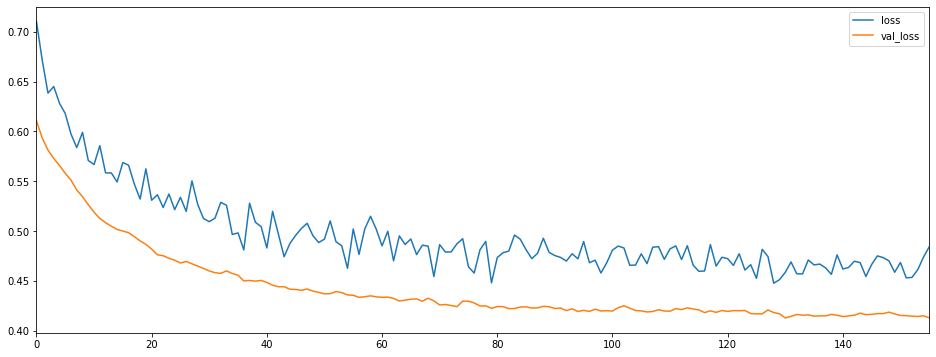

In [55]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [56]:
pree = model.predict_classes(X_test)

In [57]:
print(classification_report(y_test,pree))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       163
           1       0.87      0.62      0.73       104

    accuracy                           0.82       267
   macro avg       0.83      0.78      0.79       267
weighted avg       0.82      0.82      0.81       267

